In [46]:
import pandas as pd
import sys
sys.path.append("../scripts")
from plots import plot_histogram, plot_boxplot, correlation_matrix
from preprocess import normalize_date, drop_column, find_outliers, IQR_outlier, find_and_replace_outliers_with_median

In [4]:
data = pd.read_csv('../data/raw/data.csv')
xls_data = pd.read_excel('../data/raw/data.xlsx')

In [45]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 95469 entries, 0 to 95661
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype              
---  ------                --------------  -----              
 0   TransactionId         95469 non-null  object             
 1   BatchId               95469 non-null  object             
 2   AccountId             95469 non-null  object             
 3   SubscriptionId        95469 non-null  object             
 4   CustomerId            95469 non-null  object             
 5   CurrencyCode          95469 non-null  object             
 6   CountryCode           95469 non-null  int64              
 7   ProviderId            95469 non-null  object             
 8   ProductId             95469 non-null  object             
 9   ProductCategory       95469 non-null  object             
 10  ChannelId             95469 non-null  object             
 11  Amount                95469 non-null  float64            
 12  Value    

In [4]:
xls_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 95662 entries, 0 to 95661
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   TransactionId         95662 non-null  object 
 1   BatchId               95662 non-null  object 
 2   AccountId             95660 non-null  object 
 3   SubscriptionId        95662 non-null  object 
 4   CustomerId            95662 non-null  object 
 5   CurrencyCode          95662 non-null  object 
 6   CountryCode           95660 non-null  float64
 7   ProviderId            95660 non-null  object 
 8   ProductId             95662 non-null  object 
 9   ProductCategory       95662 non-null  object 
 10  ChannelId             95662 non-null  object 
 11  Amount                95662 non-null  float64
 12  Value                 95659 non-null  float64
 13  TransactionStartTime  95661 non-null  object 
 14  PricingStrategy       95659 non-null  float64
 15  FraudResult        

In [5]:
xls_data = drop_column(xls_data, ['Unnamed: 16', 'Unnamed: 17'])

### replace missing values with median

In [6]:
xls_data['Value'] = xls_data['Value'].fillna(xls_data['Value'].median())
xls_data['Amount'] = xls_data['Amount'].fillna(xls_data['Amount'].median())
xls_data['CountryCode'] = xls_data['CountryCode'].fillna(xls_data['CountryCode'].median())
xls_data['PricingStrategy'] = xls_data['PricingStrategy'].fillna(xls_data['PricingStrategy'].median())

### Replace missing Categorical data with Forward fill

In [7]:
xls_data['ProviderId'] = xls_data['ProviderId'].ffill()
xls_data['AccountId'] = xls_data['AccountId'].ffill()
xls_data['TransactionStartTime'] = xls_data['TransactionStartTime'].ffill()

In [30]:
normalize_date(data,'TransactionStartTime')
normalize_date(xls_data,'TransactionStartTime')
data['FraudResult'] = data['FraudResult'].astype('category')
xls_data['FraudResult'] = xls_data['FraudResult'].astype('category')
data['PricingStrategy'] = data['PricingStrategy'].astype('category')

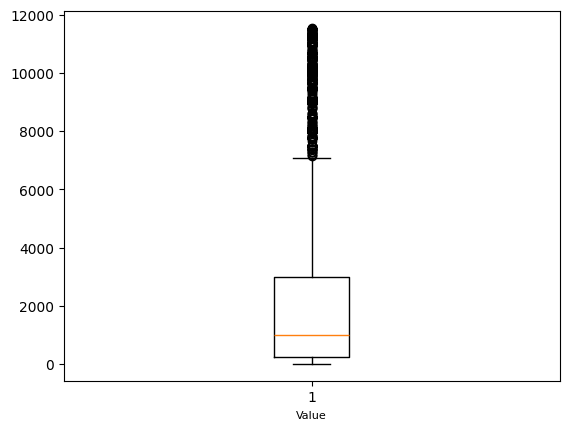

<Figure size 1000x700 with 0 Axes>

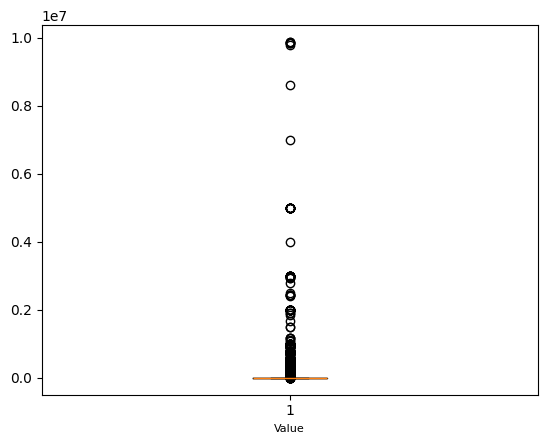

<Figure size 1000x700 with 0 Axes>

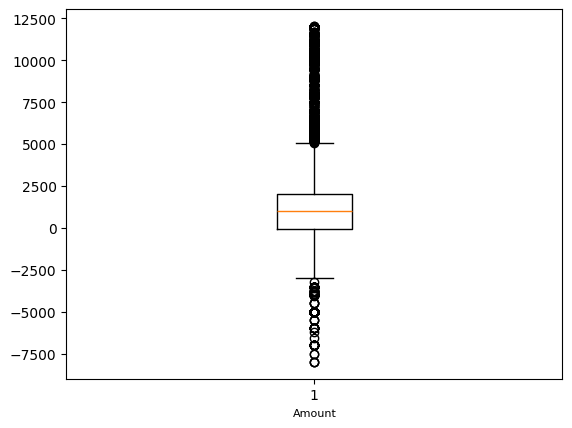

<Figure size 1000x700 with 0 Axes>

In [28]:
plot_boxplot(data, ['Value'])
plot_boxplot(xls_data, ['Value'])
plot_boxplot(data, ['Amount'])

In [17]:
data = IQR_outlier(data, [])

No outliers found in column 'CountryCode' using IQR method.
Found 24680 outliers in column 'Amount' using IQR method.
Found 8830 outliers in column 'Value' using IQR method.
Found 15760 outliers in column 'PricingStrategy' using IQR method.
No outliers found in column 'FraudResult' using IQR method.


In [31]:
find_outliers(data)

No outliers found in column 'Amount' using z-score threshold 3.
No outliers found in column 'Value' using z-score threshold 3.


[]

In [41]:
data = find_and_replace_outliers_with_median(data, ['Value', 'Amount'], 2)

Processing columns: ['Value', 'Amount']
No outliers found in column 'Value' using z-score threshold 2.
No outliers found in column 'Amount' using z-score threshold 2.


### Distribution of numberical variables

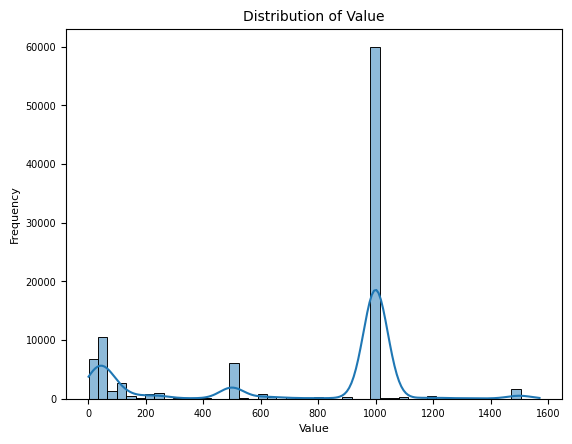

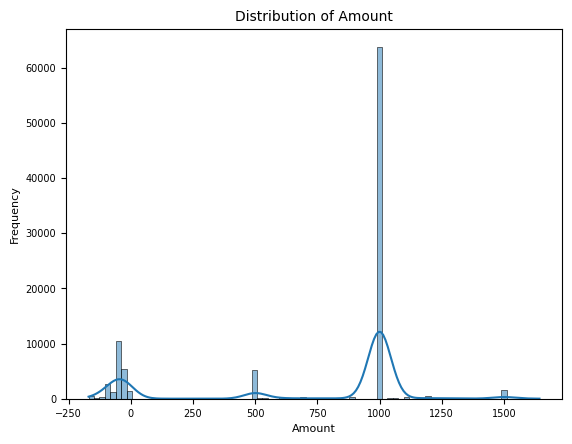

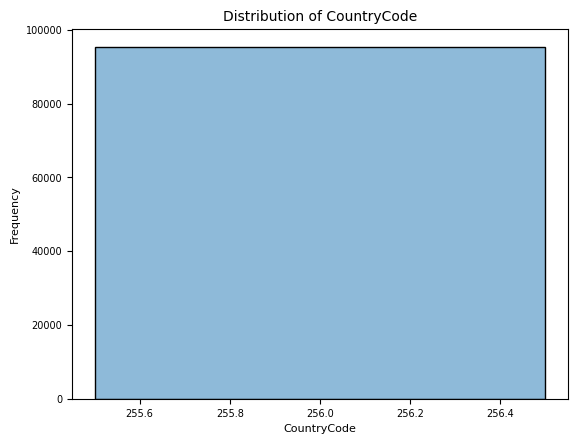

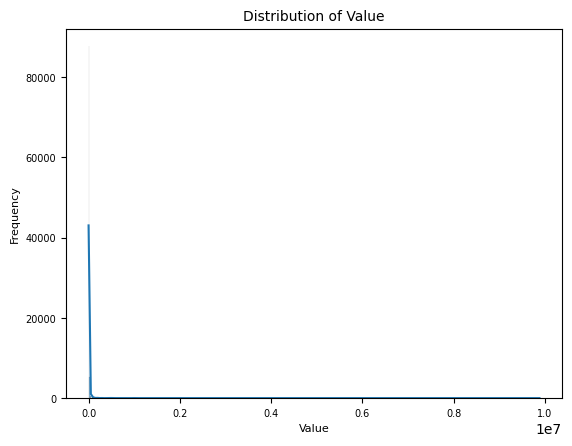

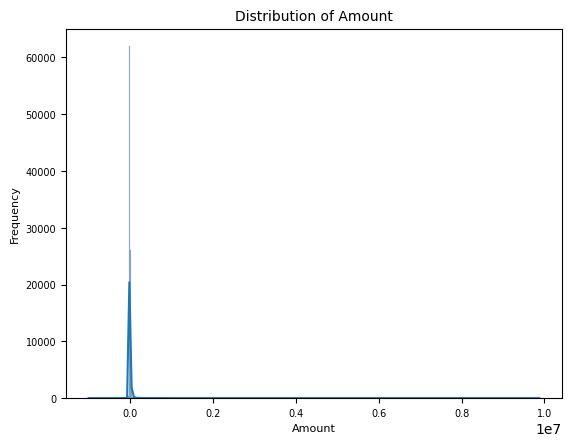

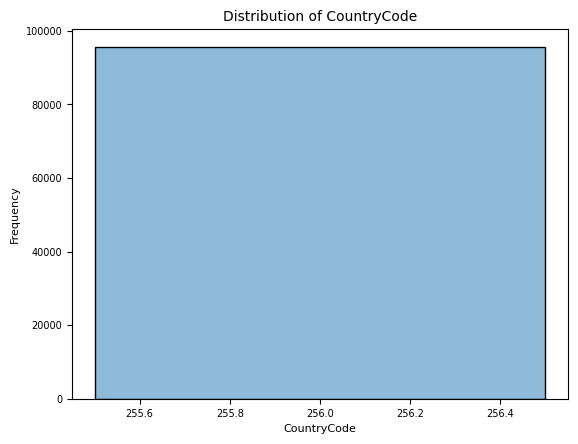

In [ ]:
plot_histogram(data, ['Value', 'Amount'])
plot_histogram(xls_data, ['Value', 'Amount'])


### Distribution of Categorical variables

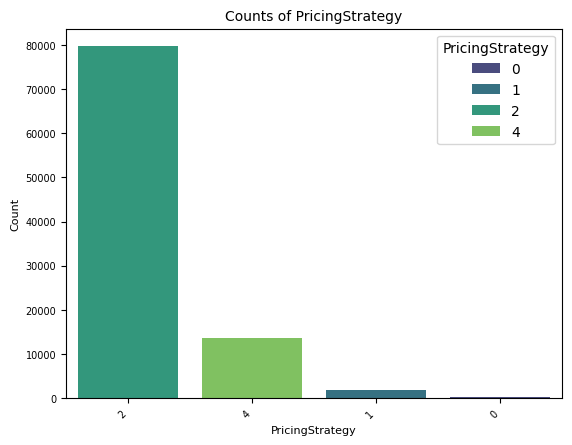

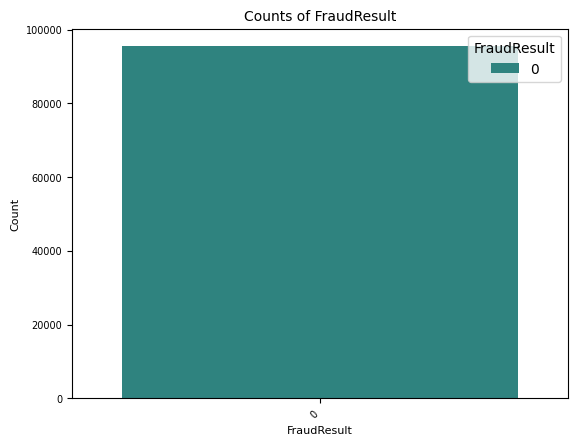

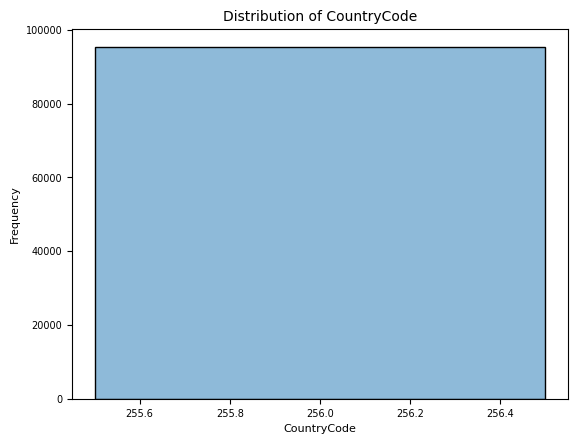

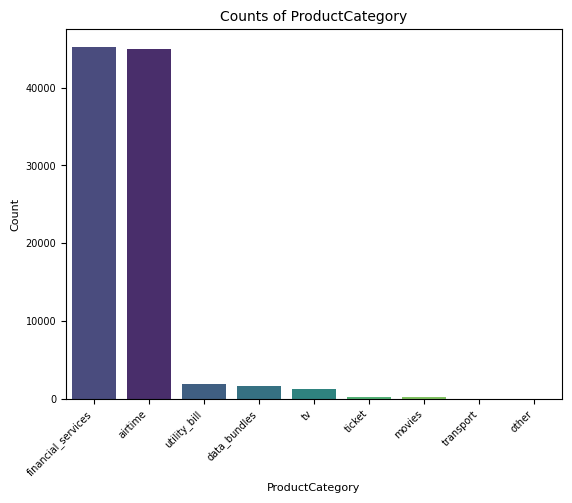

In [44]:
plot_histogram(data, ['PricingStrategy', 'FraudResult','CountryCode', 'ProductCategory'])


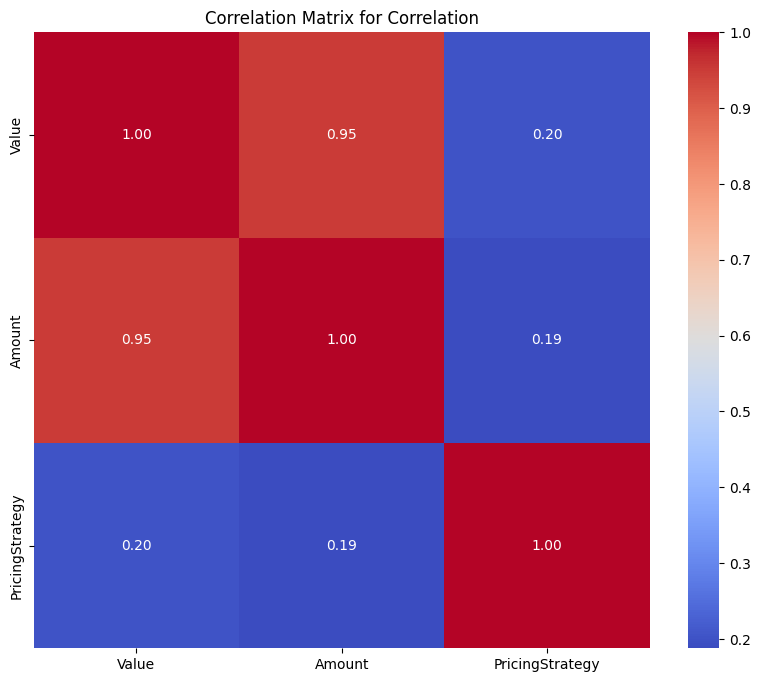

In [55]:
correlation_matrix(data, ['Value', 'Amount','PricingStrategy'], 'Correlation')